# EDA for Zomato dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Dataset from first source

In [3]:
df=pd.read_csv('zomato.csv',encoding='latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

# Load Dataset from second source

In [6]:
df_country=pd.read_excel('Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [7]:
df_country.columns

Index(['Country Code', 'Country'], dtype='object')

In [8]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  15 non-null     int64 
 1   Country       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes


## Joining 2 dataframe to create common datasource using pd.merge

In [9]:
final_df=pd.merge(df,df_country,on='Country Code',how='left')

In [10]:
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [11]:
country_names=final_df.Country.value_counts().index

In [12]:
country_values=final_df.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x1d10a27e588>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

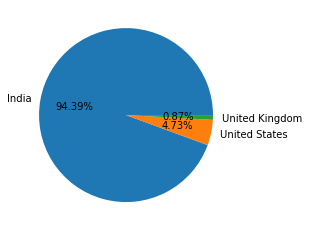

In [13]:
##Pie chart to show top 3 countries using zomato service
plt.pie(country_values[0:3],labels=country_names[0:3],autopct='%1.2f%%')

### Observations
#### India has maximum zomato transactions followed by USA and then UK

## What we will do in data analysis of this data

### 1.Finding missing values  
### 2.Finding number of numerical and categorical features 
### 3.Exploring about of numerical variables
### 4.Understanding relationships between various features of dataset

# Missing values

In [14]:
final_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

More pythonic way to find feature having missing values

In [15]:
[feature for feature in df.columns if df[feature].isnull().sum()>0]

['Cuisines']

#### Feature having null values is Cuisine

# Exploring about Categorical and numerical features

## Finding no of categorical and numerical features

In [16]:
columns = pd.DataFrame(final_df.applymap(np.isreal).all())
columns

,0
Restaurant ID,True
Restaurant Name,False
Country Code,True
City,False
Address,False
Locality,False
Locality Verbose,False
Longitude,True
Latitude,True
Cuisines,False


#### True values means it is a numerical feature and false means it is categorical feature

In [17]:
print((columns).value_counts())

False    14
True      8
dtype: int64


### There are 14 categorical and 8 numerical features 

### Creating list of categorical and numerical features

In [18]:
numerical_feature = [feature for feature in final_df.columns if final_df[feature].dtype!='O']

In [19]:
categorical_feature = [feature for feature in final_df.columns if final_df[feature].dtype=='O']

In [22]:
numerical_feature

['Restaurant ID',
 'Country Code',
 'Longitude',
 'Latitude',
 'Average Cost for two',
 'Price range',
 'Aggregate rating',
 'Votes']

### Finding discrete and continuous features 

In [25]:
discrete_feature=[feature for feature in numerical_feature if len(final_df[feature].unique())<25 and feature not in ['Restaurant ID']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [27]:
continuous_feature=[feature for feature in numerical_feature if feature not in discrete_feature+['Restaurant ID']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 5


In [28]:
discrete_feature

['Country Code', 'Price range']

In [29]:
continuous_feature

['Longitude', 'Latitude', 'Average Cost for two', 'Aggregate rating', 'Votes']

### Finding relationship between discrete and continuous features with target column 

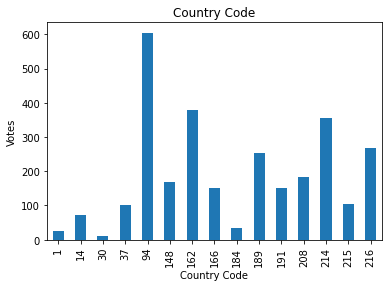

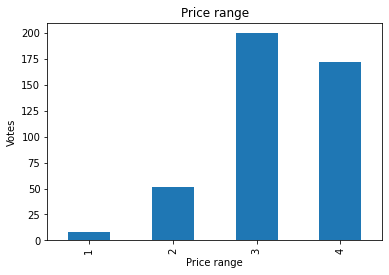

In [30]:
for feature in discrete_feature:
    data=final_df.copy()
    data.groupby(feature)['Votes'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Votes')
    plt.title(feature)
    plt.show()

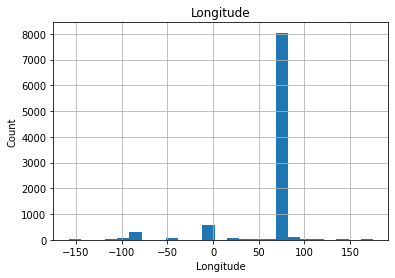

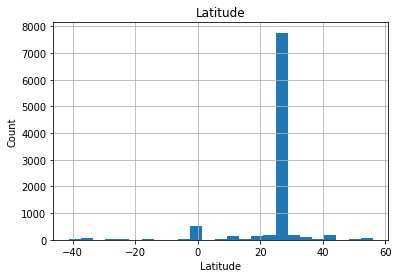

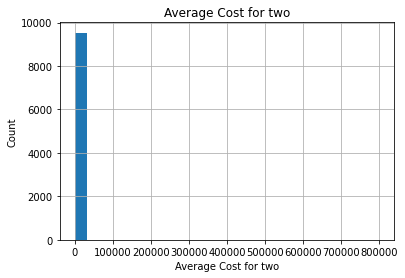

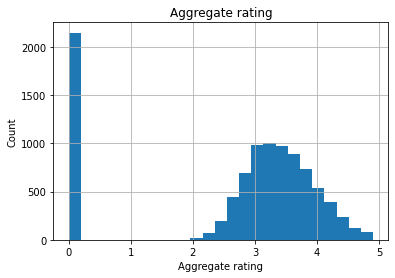

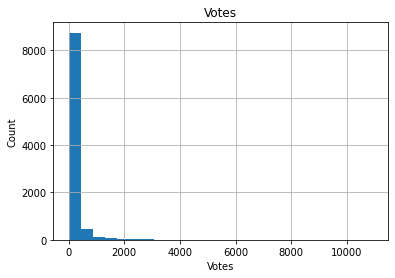

In [32]:
for feature in continuous_feature:
    data=final_df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Finding Outliers

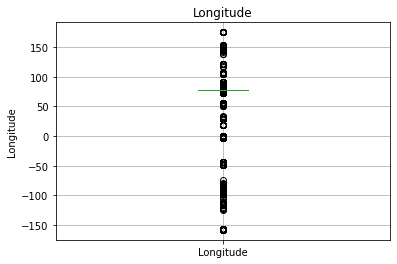

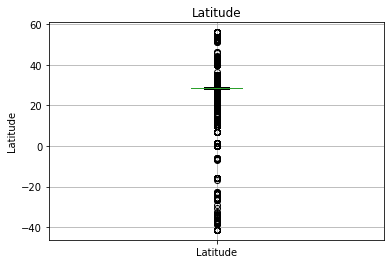

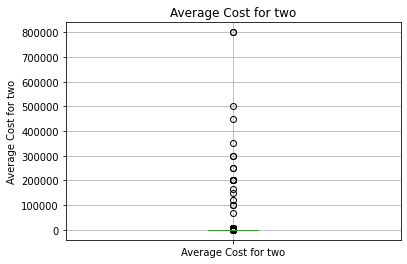

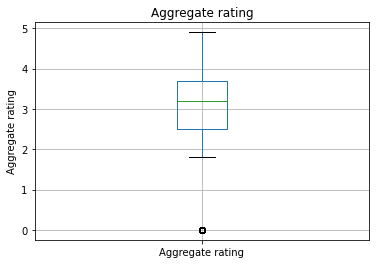

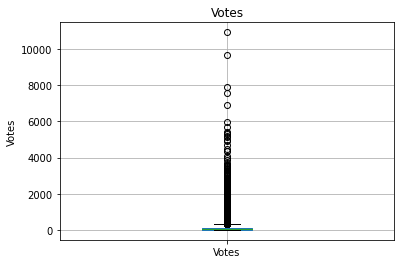

In [44]:
for feature in continuous_feature:
    data=final_df.copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()
        

### Finding no of categories in categorical features

In [47]:
for feature in categorical_feature:
    print('The feature name is {} and no of categories are {}'.format(feature,len(final_df[feature].unique())))

The feature name is Restaurant Name and no of categories are 7446
The feature name is City and no of categories are 141
The feature name is Address and no of categories are 8918
The feature name is Locality and no of categories are 1208
The feature name is Locality Verbose and no of categories are 1265
The feature name is Cuisines and no of categories are 1826
The feature name is Currency and no of categories are 12
The feature name is Has Table booking and no of categories are 2
The feature name is Has Online delivery and no of categories are 2
The feature name is Is delivering now and no of categories are 2
The feature name is Switch to order menu and no of categories are 1
The feature name is Rating color and no of categories are 6
The feature name is Rating text and no of categories are 6
The feature name is Country and no of categories are 15


C:\Users\Dell\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Dell\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Dell\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Glyph 135 (\x87) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Dell\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Dell\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Glyph 134 (\x86) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Dell\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Glyph 131 (\x83) missing from current font.
  fi

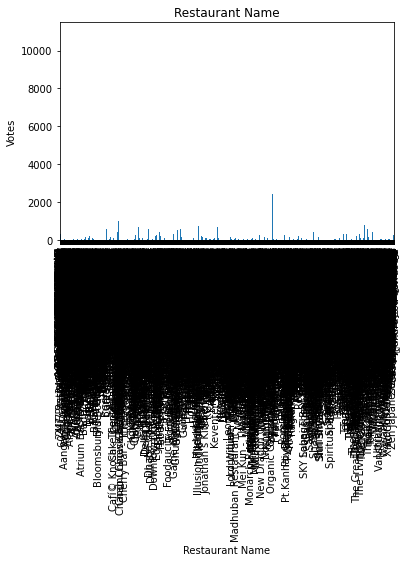

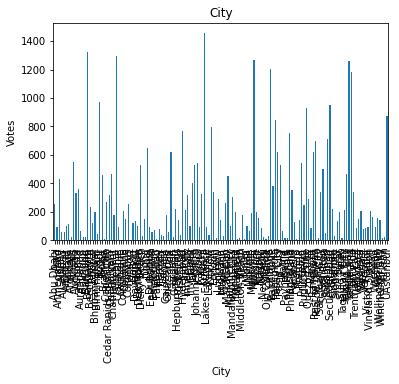

) missing from current font.site-packages\IPython\core\pylabtools.py:128: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Dell\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


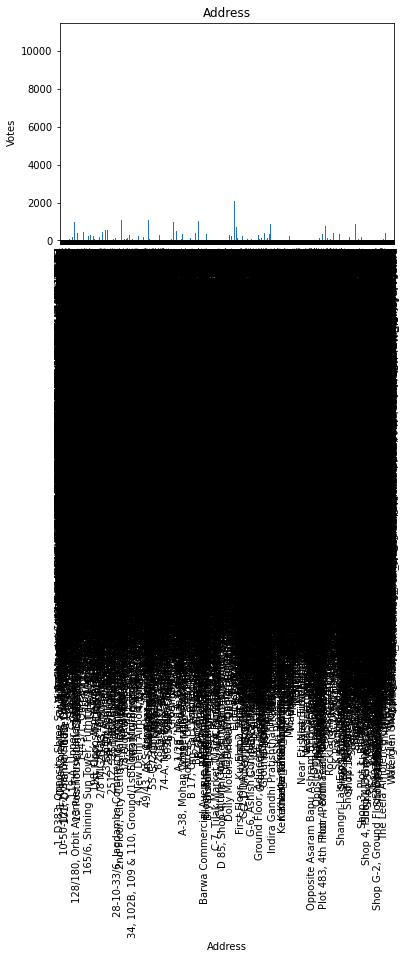

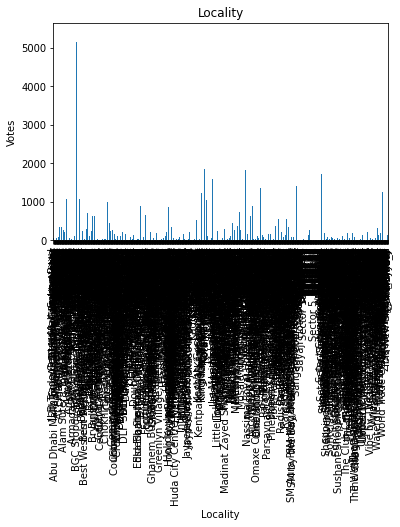

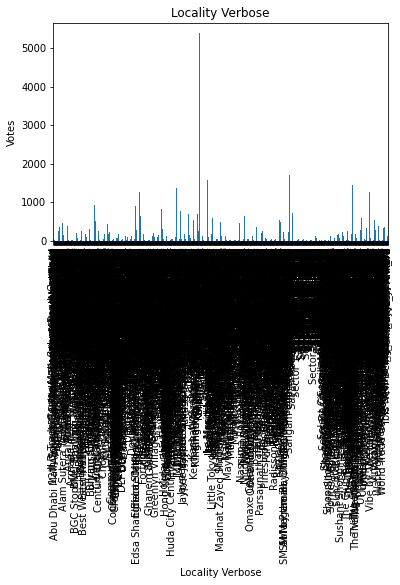

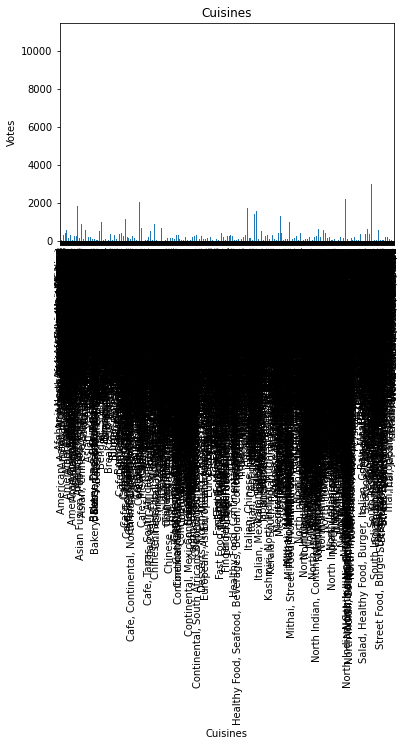

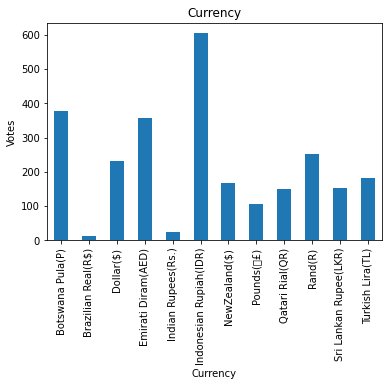

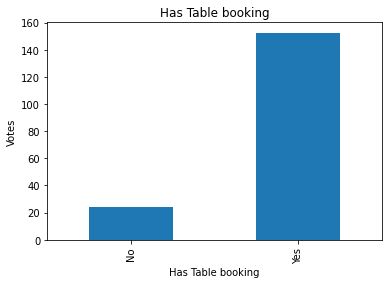

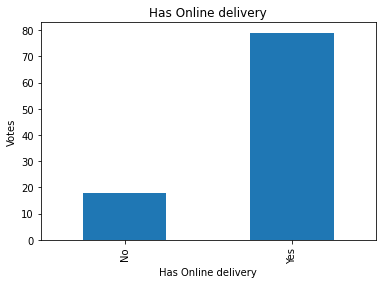

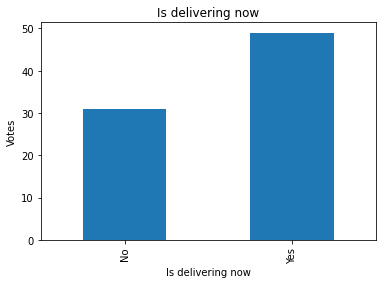

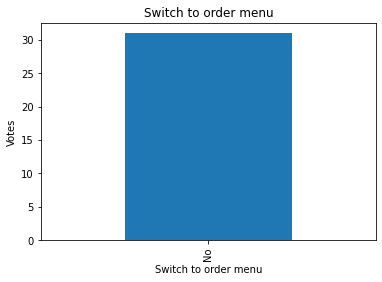

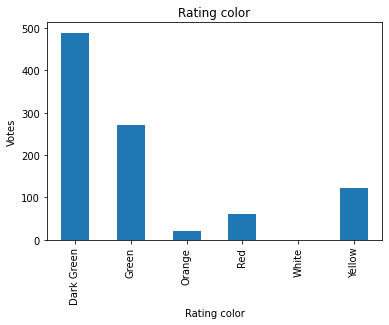

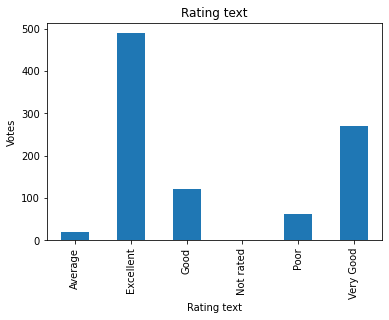

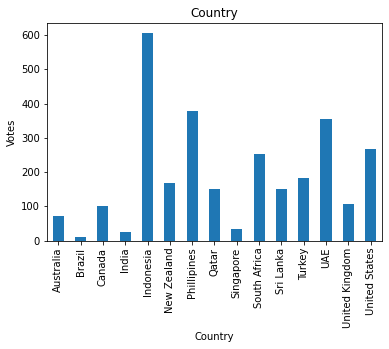

In [49]:
for feature in categorical_feature:
    data=final_df.copy()
    data.groupby(feature)['Votes'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Votes')
    plt.title(feature)
    plt.show()

# Understanding relationship between different features

In [53]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

### Finding relationship between Aggregate rating, Rating color and Rating text 

In [60]:
ratings=df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating count'})

In [61]:
ratings

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


### Observations
####  1.When rating is between 4.9 to 4.5 food rating is Excellent
####  2.When rating is between 4.4 to 4 food rating is Very Good
####  3.When rating is between 3.9 to 3.5 food rating is Good
####  4.When rating is between 3.4 to 2.5 food rating is Average
####  5.When rating is between 2.4 to 1.8 food rating is Poor
####  6.2148 people have not given any ratings 

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating count'>

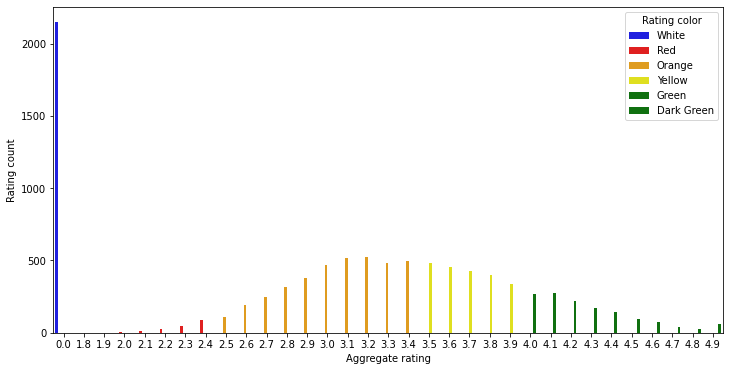

In [69]:
import matplotlib
matplotlib.rcParams['figure.figsize']= (12,6)
sns.barplot(x='Aggregate rating',
    y='Rating count',
    hue='Rating color',        
    data=ratings,
    palette=['blue','red','orange','yellow','green','green'])

<AxesSubplot:xlabel='Rating color', ylabel='count'>

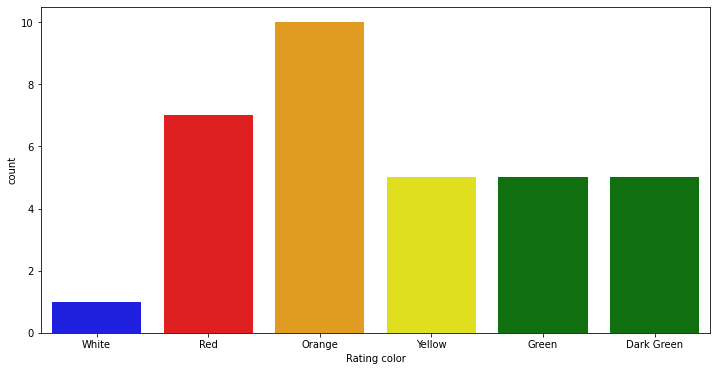

In [70]:
sns.countplot(x='Rating color', data=ratings, palette=['blue','red','orange','yellow','green','green'])

In [86]:
##countries that have given 0 ratings
final_df[final_df['Aggregate rating']==0.0].groupby('Country').size().reset_index().rename(columns={0:'Frequency'})

,Country,Frequency
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


### Observations
#### Maximum 0 ratings are comming from India country

In [138]:
#Which currency is used by which country
final_df.columns
grouped_df=final_df.groupby(['Country','Currency']).size().reset_index()
grouped_df[['Country','Currency']]

,Country,Currency
0,Australia,Dollar($)
1,Brazil,Brazilian Real(R$)
2,Canada,Dollar($)
3,India,Indian Rupees(Rs.)
4,Indonesia,Indonesian Rupiah(IDR)
5,New Zealand,NewZealand($)
6,Phillipines,Botswana Pula(P)
7,Qatar,Qatari Rial(QR)
8,Singapore,Dollar($)
9,South Africa,Rand(R)


In [139]:
#Which countries have online deliveries
final_df.columns
final_df[final_df['Has Online delivery']=='Yes'].groupby('Country').size().reset_index()

,Country,0
0,India,2423
1,UAE,28


### Observations
#### Only India and UAE has  online delivery